In [11]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
from sklearn.linear_model import LogisticRegression
from ISLP.models import ModelSpec as MS, summarize, poly
import statsmodels.api as sm
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm

In [3]:
# Part A generating data
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

Text(0, 0.5, 'X2')

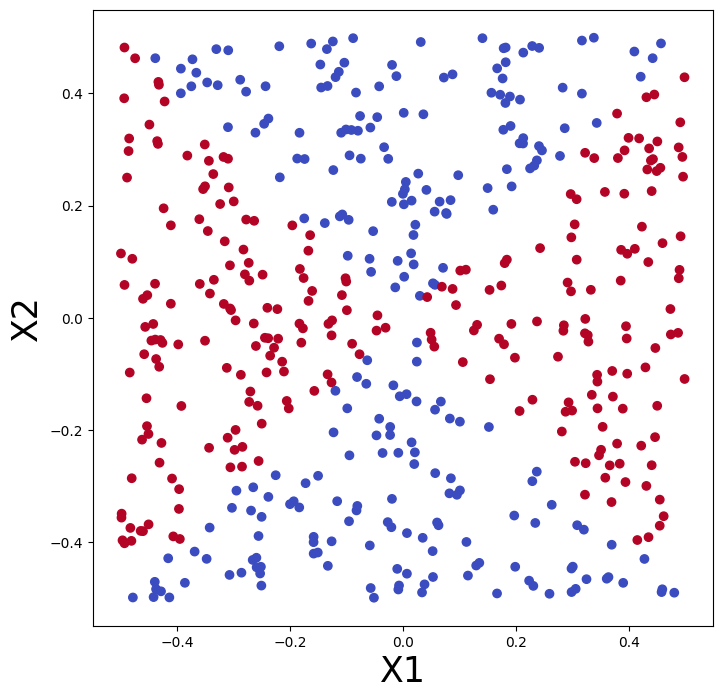

In [4]:
# Part B: Plotting
fig, ax = subplots(figsize=(8,8))
ax.scatter(x1,
           x2,
           c=y,
          cmap = cm.coolwarm);
ax.set_xlabel("X1", fontsize=25)
ax.set_ylabel("X2", fontsize=25)

In [5]:
# Part C: Logistic Regression fit
df = pd.DataFrame({'x1':x1, 'x2':x2})
design = MS(['x1','x2'])
X = design.fit_transform(df)
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0221,0.090,0.246,0.805
x1,-0.1662,0.308,-0.540,0.589
x2,0.0901,0.306,0.294,0.769


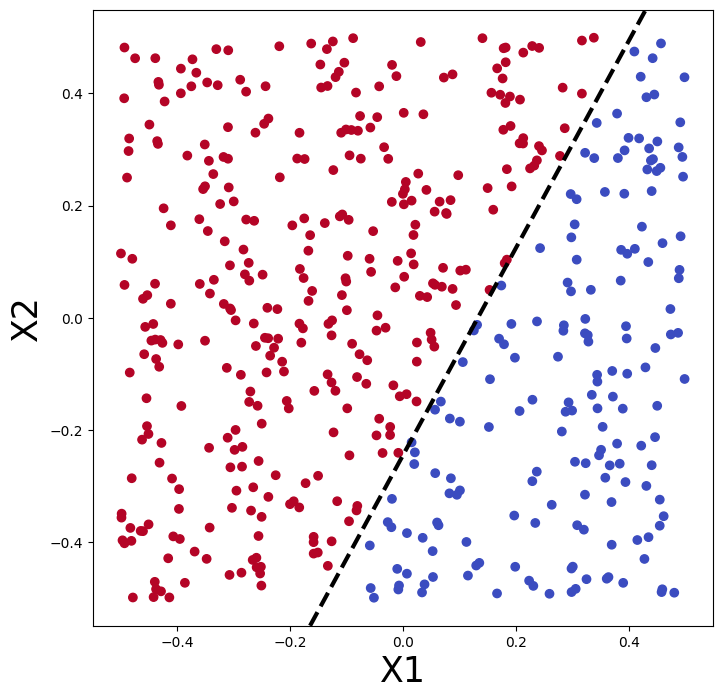

In [6]:
# Part D: Predicting and Plotting
probs = results.predict()
y_hat = probs > 0.5
fig, ax = subplots(figsize=(8,8))
ax.scatter(x1,
           x2,
           c=y_hat,
          cmap = cm.coolwarm);

intercept = -results.params[0]/results.params[2]
slope = -results.params[1]/results.params[2]
l1=ax.axline(xy1=(0,intercept), slope=slope,color='black',ls='--', linewidth=3)
ax.set_xlabel("X1", fontsize=25);
ax.set_ylabel("X2", fontsize=25);

In [7]:
# Part E: Fitting on transformed predictors
df = pd.DataFrame({'x1':x1, 'x2':x2})
design = MS([poly('x1',degree=2) ,poly('x2',degree=2)])
X = design.fit_transform(df)
glm = sm.GLM(y, X, family=sm.families.Binomial())
results_ = glm.fit()
summarize(results_)
# Ignore the errors because model looks great!

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  w

,coef,std err,z,P>|z|
intercept,-119.3456,153000.0,-0.001,0.999
"poly(x1, degree=2)[0]",-1838.0358,9170000.0,-0.000,1.000
"poly(x1, degree=2)[1]",68330.0000,31700000.0,0.002,0.998
"poly(x2, degree=2)[0]",1555.7706,7330000.0,0.000,1.000
"poly(x2, degree=2)[1]",-71960.0000,33300000.0,-0.002,0.998


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


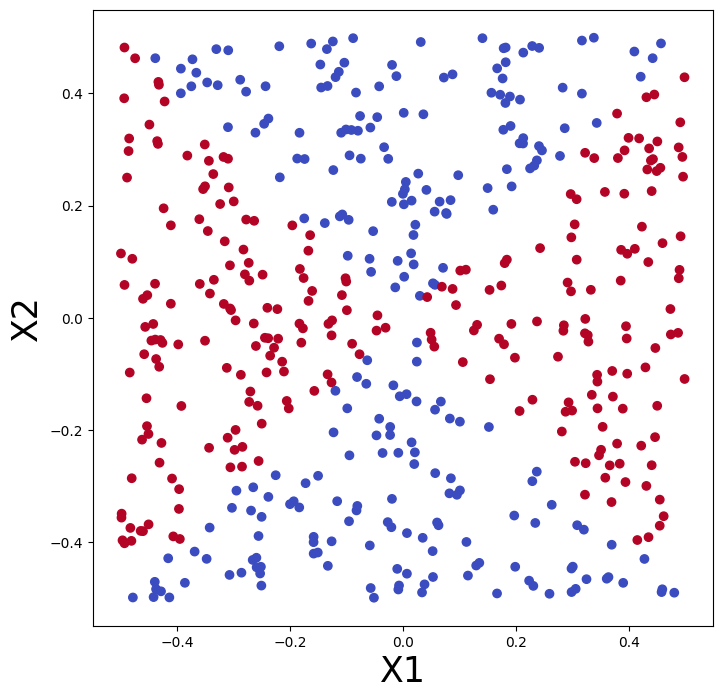

In [8]:
# Part F: Plot new model
probs_ = results_.predict()
y_hat_ = probs_ > 0.5
fig, ax = subplots(figsize=(8,8))
ax.scatter(x1,
           x2,
           c=y_hat_,
          cmap = cm.coolwarm);

ax.set_xlabel("X1", fontsize=25);
ax.set_ylabel("X2", fontsize=25);

In [16]:
# Part G: SVC with X1 X2
# Fit Support vector classifier
svm_linear = SVC(C=10, # Tolerance for missclassification
                 kernel='linear')
svm_linear.fit(df,y)

SVC(C=10, kernel='linear')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


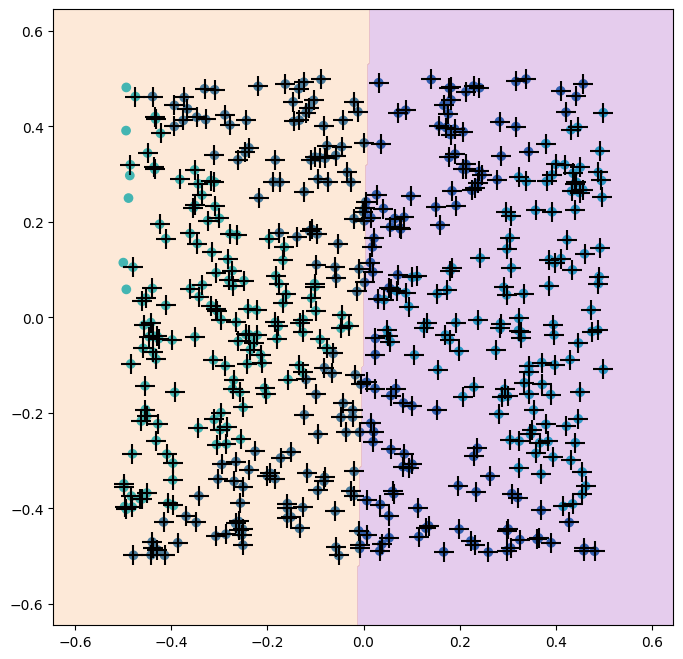

In [18]:
fig, ax = subplots(figsize=(8,8))
plot_svm(df,
         y,
         svm_linear,
         ax=ax)
# Model is awful

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


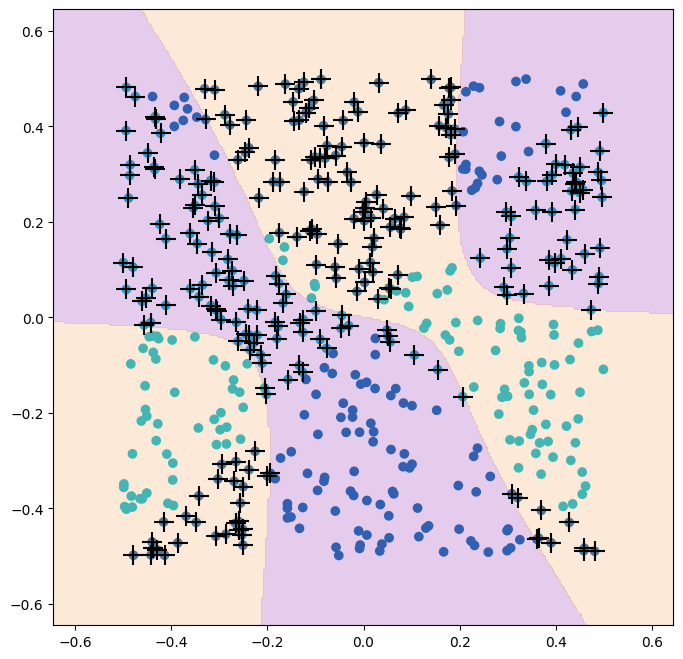

In [22]:
# Part H: SVC with non-linear kernel
# Fit Support vector classifier
svm_linear = SVC(C=10, # Tolerance for missclassification
                 kernel='s')
svm_linear.fit(df,y)
fig, ax = subplots(figsize=(8,8))
plot_svm(df,
         y,
         svm_linear,
         ax=ax)
# RBF does alright, but for this highly non linear decision boundary Log Reg outperforms drastically

In [21]:
?SVC

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the